In [2]:
import glob
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from adjustText import adjust_text

metrics_to_use = ["student_model_name", "T", "bs", "loss_ratio", 
                  "conditional", "curriculum", "cosine_decay",
                  "inference_speed", "student_memory", "student_num_params", 
                  "train_loss", "val_loss", "train_acc", "val_acc"]

In [3]:
json_files = glob.glob('./results/*.json')
json_file_names = [os.path.basename(file) for file in json_files]

print(json_file_names)

['ghostnet-best;0.966721-lr;0.001-bs;256-weight_decay;0-T;1-loss_ratio;0-conditional;False-curriculum;False-cosine_decay;False.json', 'ghostnet-best;0.96998-lr;0.001-bs;256-weight_decay;0-T;2-loss_ratio;0.5-conditional;False-curriculum;False-cosine_decay;False.json', 'ghostnet-best;0.970224-lr;0.001-bs;256-weight_decay;0-T;4-loss_ratio;0.5-conditional;True-curriculum;False-cosine_decay;False-bird;False-custom;False.json', 'ghostnet-best;0.970956-lr;0.001-bs;256-weight_decay;0-T;4-loss_ratio;0.5-conditional;False-curriculum;False-cosine_decay;False.json', 'ghostnet-best;0.971032-lr;0.001-bs;256-weight_decay;0-T;6-loss_ratio;0.5-conditional;False-curriculum;False-cosine_decay;False.json', 'ghostnet-best;0.971764-lr;0.001-bs;256-weight_decay;0-T;4-loss_ratio;0.5-conditional;False-curriculum;True-cosine_decay;False.json', 'ghostnet-best;0.972985-lr;0.001-bs;256-weight_decay;0-T;4-loss_ratio;0.5-conditional;False-curriculum;True-cosine_decay;True.json', 'mobilenet-V3-large-best-0.965172-lr;

In [4]:
json_data = []

for file in json_files:
    with open(file, 'r') as json_file:
        if "vgg16" not in file:
            data = json.load(json_file)
            json_data.append(data)
        else:
            teacher_data = json.load(json_file)


In [5]:
teacher_data

{'num_epochs': 20,
 'lr': 0.001,
 'bs': 256,
 'weight_decay': 0,
 'student_model_name': 'mobilenet-V3-large',
 'train_dir': 'real_data',
 'val_dir': 'val',
 'n_classes': 4,
 'T': 1,
 'loss_ratio': 0,
 'greyscale': False,
 'pretrained': False,
 'train_split': 0.8,
 'teacher_model_name': 'vgg16',
 'finetuned': False,
 'filename': 'vgg16-best-0.99625-lr;0.001-bs;256-weight_decay;0-train_dir;real_data-val_dir;val-finetuned;False',
 'train_speed': [1335.5513310432434,
  991.1837334632874,
  1100.7363047599792,
  993.4505326747894,
  1146.4777796268463,
  926.1254060268402,
  909.82905626297,
  671.4268491268158,
  923.6541693210602,
  310.7889451980591,
  19.133223056793213,
  19.15027165412903,
  19.119204998016357,
  19.119487047195435,
  19.153185844421387,
  19.169601917266846,
  19.171563386917114,
  19.165995597839355,
  19.161134243011475,
  19.161447048187256],
 'inference_speed': [336.93229842185974,
  239.85932970046997,
  218.39346146583557,
  240.37179470062256,
  268.5185589790

In [6]:
teacher_data["student_model_name"] = "teacher_model"
# last loss/acc
teacher_data["train_loss"] = teacher_data["train_loss"][-1]
teacher_data["train_acc"] = teacher_data["train_acc"][-1]
# min inference speed
teacher_data["inference_speed"] = min(teacher_data["inference_speed"])
teacher_data["val_loss"] = teacher_data["val_loss"][-1]
teacher_data["val_acc"] = teacher_data["val_acc"][-1]
teacher_data = [{key: teacher_data.get(key, False) for key in metrics_to_use}]
teacher_data

[{'student_model_name': 'teacher_model',
  'T': 1,
  'bs': 256,
  'loss_ratio': 0,
  'conditional': False,
  'curriculum': False,
  'cosine_decay': False,
  'inference_speed': 4.198996543884277,
  'student_memory': 512.2214508056641,
  'student_num_params': 134275780,
  'train_loss': 0.012928658934859933,
  'val_loss': 0.009958957340422785,
  'train_acc': 0.995735012755102,
  'val_acc': 0.9959374976158142}]

In [7]:
json_data

[{'num_epochs': 20,
  'lr': 0.001,
  'bs': 256,
  'weight_decay': 0,
  'student_model_name': 'ghostnet',
  'train_dir': 'real_data',
  'val_dir': 'val',
  'n_classes': 4,
  'T': 1,
  'loss_ratio': 0,
  'greyscale': False,
  'pretrained': False,
  'train_split': 0.8,
  'teacher_model_name': 'vgg16',
  'finetuned': False,
  'conditional': False,
  'curriculum': False,
  'cosine_decay': False,
  'filename': 'ghostnet-best;0.966721-lr;0.001-bs;256-weight_decay;0-T;1-loss_ratio;0-conditional;False-curriculum;False-cosine_decay;False',
  'train_speed': [1349.1383533477783,
   1404.5037298202515,
   1349.7700653076172,
   612.2428941726685,
   324.5009355545044,
   1661.7548141479492,
   1055.5276501178741,
   861.4509520530701,
   68.79461622238159,
   34.68239092826843,
   34.698007583618164,
   34.7096951007843,
   34.69310927391052,
   34.71204972267151,
   34.69988560676575,
   34.69197988510132,
   34.695531129837036,
   34.69857954978943,
   34.68480205535889,
   39.961679220199585],
 

In [8]:
json_data = [{key: report.get(key, False) for key in metrics_to_use} for report in json_data]
json_data

[{'student_model_name': 'ghostnet',
  'T': 1,
  'bs': 256,
  'loss_ratio': 0,
  'conditional': False,
  'curriculum': False,
  'cosine_decay': False,
  'inference_speed': [249.29871010780334,
   4.253175973892212,
   4.3081042766571045,
   4.236441135406494,
   4.278482913970947,
   4.273355484008789,
   4.308765649795532,
   4.221397876739502,
   3.6807851791381836,
   3.1157236099243164,
   3.1196298599243164,
   3.1185414791107178,
   3.122185230255127,
   3.1212849617004395,
   3.1200835704803467,
   3.1186463832855225,
   3.1155893802642822,
   3.118173837661743,
   3.1031830310821533,
   3.955597400665283],
  'student_memory': 14.990440368652344,
  'student_num_params': 3904964,
  'train_loss': [0.4332480953365076,
   0.13599227039051837,
   0.07879367432572314,
   0.052540061598429916,
   0.03947678072851334,
   0.036204311966163215,
   0.026364589772248245,
   0.023065894668479067,
   0.022374374644075077,
   0.01812042410248799,
   0.014392025863702149,
   0.015911960076410932

In [9]:
# Aggregate data
# last loss/acc and min inference speed
for report in json_data:
    for key, value in report.items():
        # if isinstance(value, list):
        if key in ['train_loss', 'train_acc', 'val_loss', 'val_acc']:
            new_value = value[-1]
            report[key] = new_value
        if key == 'inference_speed':
            new_value = min(value)
            report[key] = new_value

json_data

[{'student_model_name': 'ghostnet',
  'T': 1,
  'bs': 256,
  'loss_ratio': 0,
  'conditional': False,
  'curriculum': False,
  'cosine_decay': False,
  'inference_speed': 3.1031830310821533,
  'student_memory': 14.990440368652344,
  'student_num_params': 3904964,
  'train_loss': 0.008659246514816615,
  'val_loss': 0.15445070161877084,
  'train_acc': 0.9968946268323993,
  'val_acc': 0.9642045423388481},
 {'student_model_name': 'ghostnet',
  'T': 2,
  'bs': 256,
  'loss_ratio': 0.5,
  'conditional': False,
  'curriculum': False,
  'cosine_decay': False,
  'inference_speed': 3.8295445442199707,
  'student_memory': 14.990440368652344,
  'student_num_params': 3904964,
  'train_loss': 0.02611632431383993,
  'val_loss': 0.3513650468812557,
  'train_acc': 0.9961365798457724,
  'val_acc': 0.9378639906644821},
 {'student_model_name': 'ghostnet',
  'T': 4,
  'bs': 256,
  'loss_ratio': 0.5,
  'conditional': True,
  'curriculum': False,
  'cosine_decay': False,
  'inference_speed': 3.28142905235290

In [10]:
full_json = (teacher_data + json_data)

In [133]:
df = pd.DataFrame(full_json)
# df.insert(column="model_name", loc=1, value=f"{df['student_model_name']}_T={df['T']}_lossr={df['loss_ratio']}")
df.insert(loc=1, column='full_model_name', 
          value=df['student_model_name'] + 
                '_T=' + df['T'].astype(str) + 
                '_lossr=' + df['loss_ratio'].astype(str) + 
                '_cond=' + df['conditional'].astype(str) +
                '_curr=' + df['curriculum'].astype(str) +
                '_cosd=' + df['cosine_decay'].astype(str))
df.insert(loc=2, column='hyperparameters', 
          value=np.where(df['curriculum'], 
                           # Add a string to numpy array of strings element-wise
                           np.core.defchararray.add(" Curr + ", np.where(df['cosine_decay'], "Cos decay", "Lin decay")),
                           ' T=' + df['T'].astype(str)) +
                  np.where(df['conditional'], 
                           " Cond", 
                           ' lossr=' + df['loss_ratio'].astype(str)))
df.insert(loc=2, column='model_name', 
          value=df['student_model_name'] + df['hyperparameters'])
df['student_num_params'] = df['student_num_params'] / 1e6
df["relative_val_loss"] = df["val_loss"] / teacher_data[0]["val_loss"]
df["relative_val_acc"] = df["val_acc"] / teacher_data[0]["val_acc"]
df["inference_speedup"] = teacher_data[0]["inference_speed"] / df["inference_speed"]

print(df.shape)
# Filter batch size 256
df = df[(df['model_name'] == 'teacher_model') | (df['bs'] == 256)].reset_index(drop=True)
print(df)
print(df.shape)

df_melted_model = pd.melt(df, id_vars=["student_model_name", "model_name"], var_name="metric", value_name="value")

(27, 20)
    student_model_name                                    full_model_name  \
0        teacher_model  teacher_model_T=1_lossr=0.0_cond=False_curr=Fa...   
1             ghostnet  ghostnet_T=1_lossr=0.0_cond=False_curr=False_c...   
2             ghostnet  ghostnet_T=2_lossr=0.5_cond=False_curr=False_c...   
3             ghostnet  ghostnet_T=4_lossr=0.5_cond=True_curr=False_co...   
4             ghostnet  ghostnet_T=4_lossr=0.5_cond=False_curr=False_c...   
5             ghostnet  ghostnet_T=6_lossr=0.5_cond=False_curr=False_c...   
6             ghostnet  ghostnet_T=4_lossr=0.5_cond=False_curr=True_co...   
7             ghostnet  ghostnet_T=4_lossr=0.5_cond=False_curr=True_co...   
8   mobilenet-V3-large  mobilenet-V3-large_T=1_lossr=0.0_cond=False_cu...   
9   mobilenet-V3-large  mobilenet-V3-large_T=4_lossr=0.5_cond=False_cu...   
10  mobilenet-V3-large  mobilenet-V3-large_T=6_lossr=0.5_cond=False_cu...   
11  mobilenet-V3-large  mobilenet-V3-large_T=4_lossr=0.5_cond=True_

In [126]:
df_melted_losses = df_melted_model[df_melted_model["metric"].isin(['train_loss', 'val_loss'])]
def plot_losses(df_melted_losses, model_group="All", plot=False):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='metric', y='value', hue='model_name', data=df_melted_losses)
    plt.title('Absolute and Loss Metrics')
    plt.savefig(f'images/losses_{model_group}.png')
    if plot:
        plt.show()

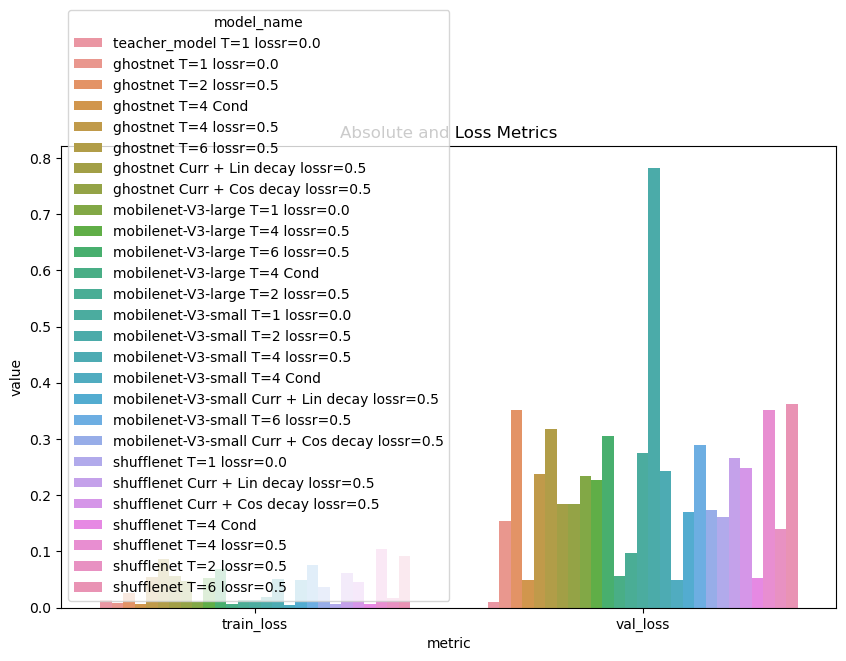

In [127]:
plot_losses(df_melted_losses)

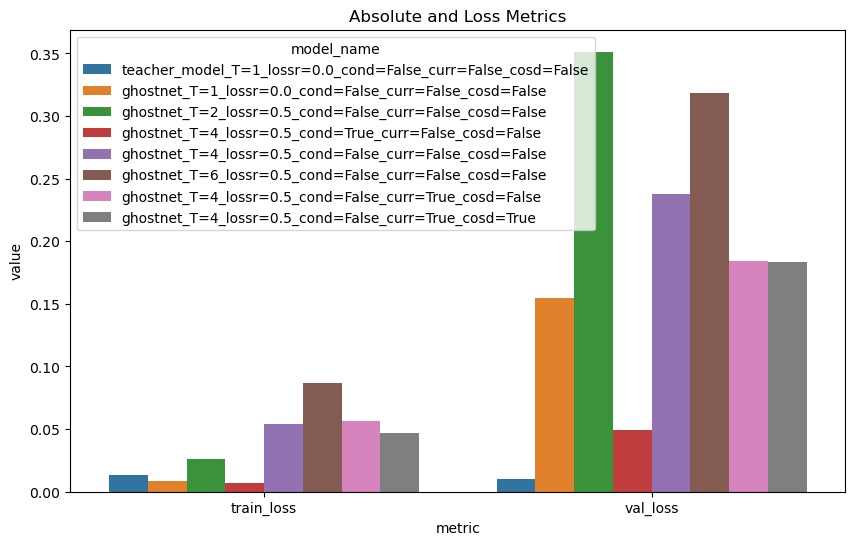

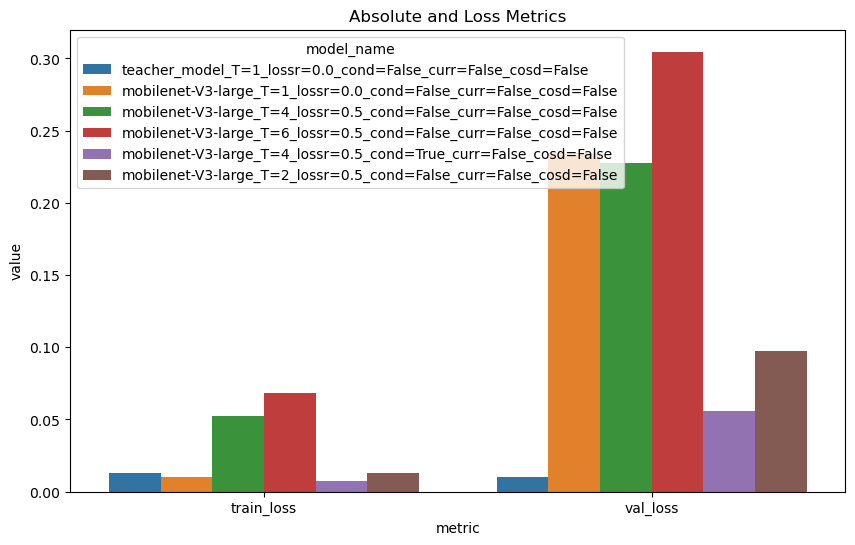

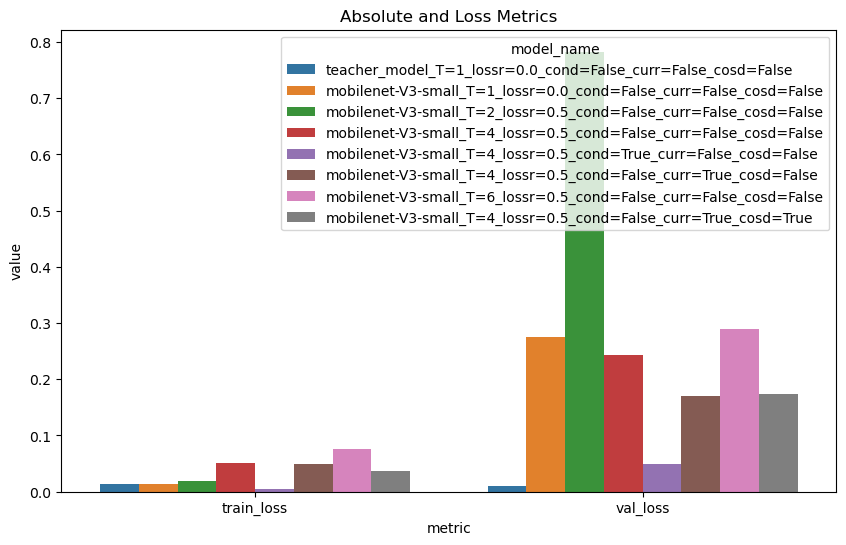

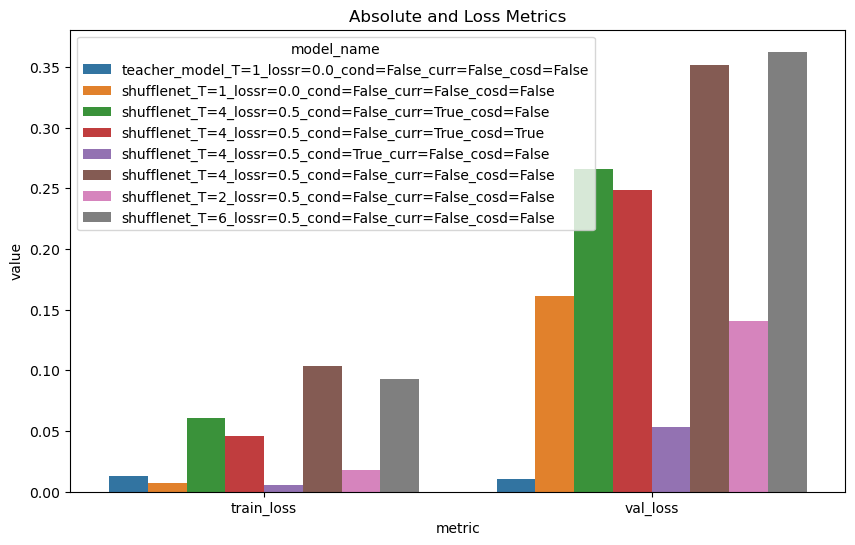

In [14]:
plot_losses(df_melted_losses[df_melted_losses["student_model_name"].isin(["teacher_model", "ghostnet"])], model_group="ghostnet")
plot_losses(df_melted_losses[df_melted_losses["student_model_name"].isin(["teacher_model", "mobilenet-V3-large"])], model_group="mobilenet-V3-large")
plot_losses(df_melted_losses[df_melted_losses["student_model_name"].isin(["teacher_model", "mobilenet-V3-small"])], model_group="mobilenet-V3-small")
plot_losses(df_melted_losses[df_melted_losses["student_model_name"].isin(["teacher_model", "shufflenet"])], model_group="shufflenet")

In [15]:
df_melted_accs = df_melted_model[df_melted_model["metric"].isin(['train_acc', 'val_acc', 'relative_val_acc'])]
def plot_accs(df_melted_accs, model_group="All", plot=False):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='metric', y='value', hue='model_name', data=df_melted_accs)
    plt.ylim(bottom=min(df_melted_accs["value"])-0.01)
    plt.title('Train, Validation and Relative Accuracy Metrics')
    plt.savefig(f'images/accs_{model_group}.png')
    if plot:
        plt.show()

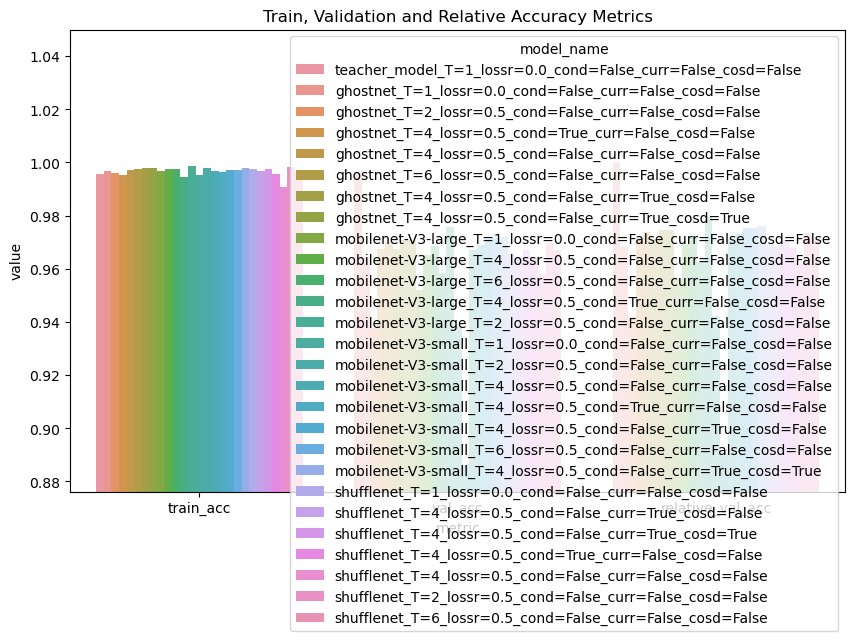

In [16]:
plot_accs(df_melted_accs)

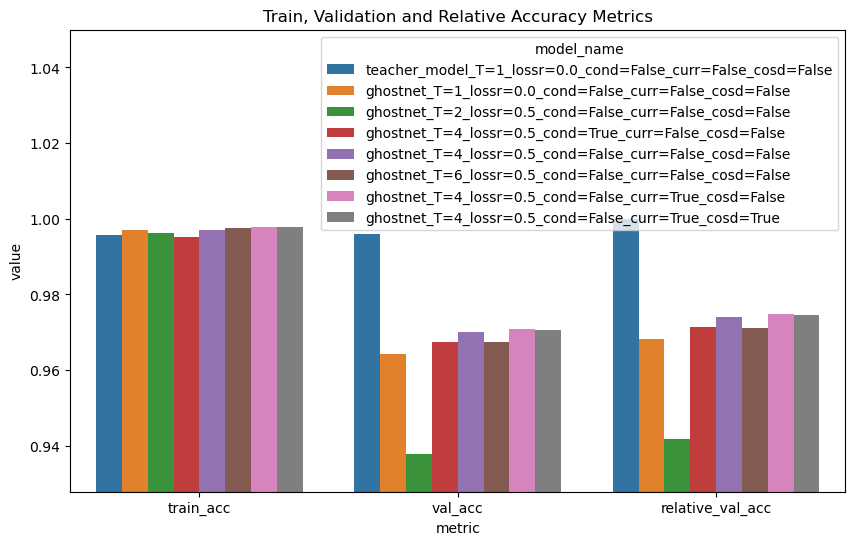

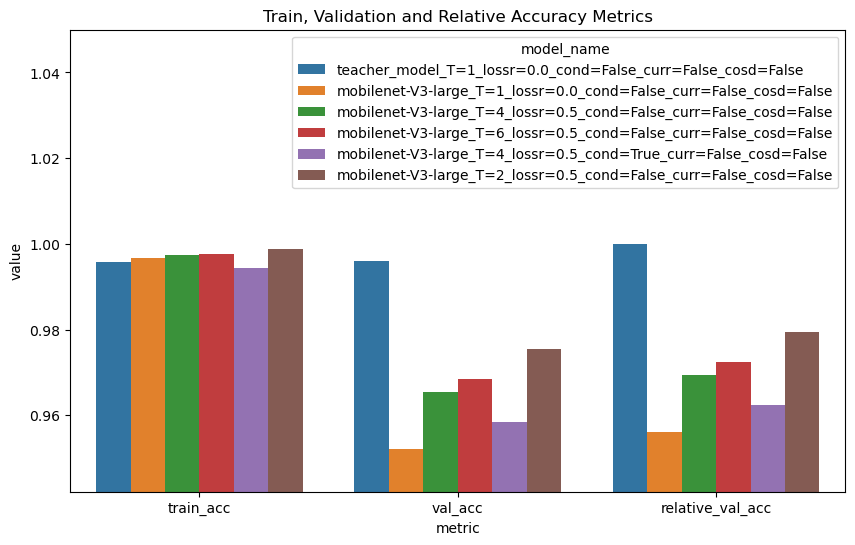

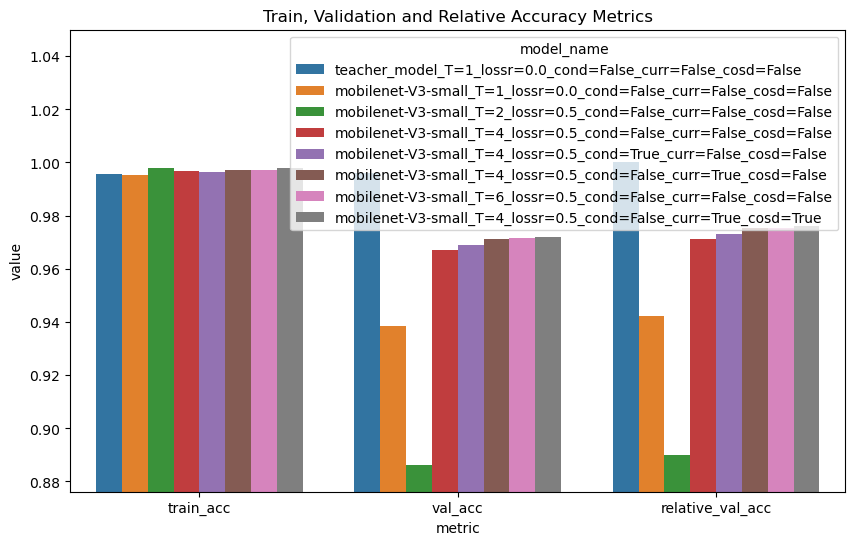

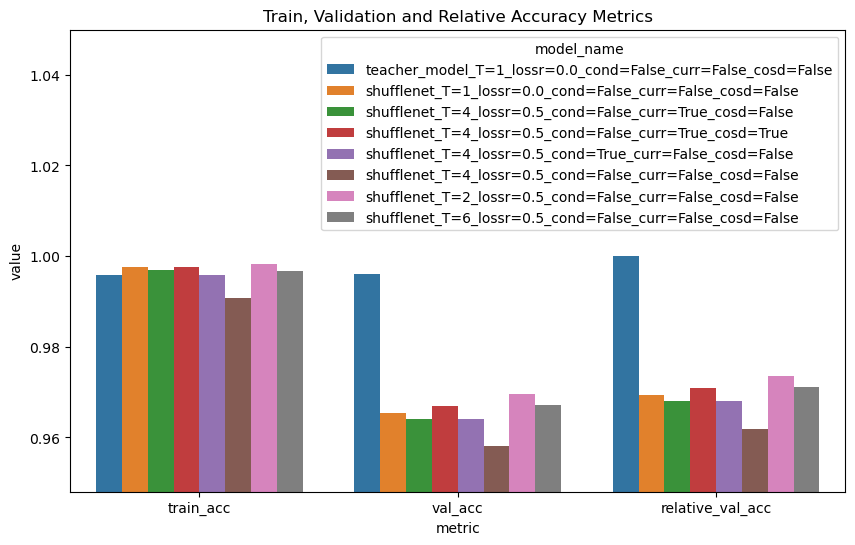

In [17]:
plot_accs(df_melted_accs[df_melted_accs["student_model_name"].isin(["teacher_model", "ghostnet"])], model_group="ghostnet")
plot_accs(df_melted_accs[df_melted_accs["student_model_name"].isin(["teacher_model", "mobilenet-V3-large"])], model_group="mobilenet-V3-large")
plot_accs(df_melted_accs[df_melted_accs["student_model_name"].isin(["teacher_model", "mobilenet-V3-small"])], model_group="mobilenet-V3-small")
plot_accs(df_melted_accs[df_melted_accs["student_model_name"].isin(["teacher_model", "shufflenet"])], model_group="shufflenet")

## Scatter plots for model comparison

In [144]:
def is_float(s):
    """
    Helper function to check if string can be converted to float.
    """
    try:
        float(s)
        return True
    except ValueError:
        return False

def scatterplot_compare(df, model_group="All", plot=False, model_name_pos="lower right", model_size_pos="upper left"):
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    

    if model_group.lower() == "best":
        name_column = "model_name"
        legend_name = "Model name"
    else:
        name_column = "hyperparameters"
        legend_name = "Hyperparameters"

    # Create a color palette
    palette = sns.color_palette("hls", df[name_column].nunique())
    
    scatter = sns.scatterplot(data=df, x='inference_speedup', y='relative_val_acc', 
                              size='student_memory', sizes=(50, 200), 
                              hue=name_column, palette=palette)

    plt.xlim(left=1)
    plt.ylim(top=1)

    # Get labels of double legend
    handles, labels = scatter.get_legend_handles_labels()
    # Round model sizes and add MB, leave model names as is
    labels = [f'{round(float(label), 1)} MB' if is_float(label) else label for label in labels]
    
    # Create two legends: one for size and one for model name (hue)
    size_legend = plt.legend(handles[-len(df['student_memory'].unique()):], 
                             labels[-len(df['student_memory'].unique()):], 
                             title='Model size (MB)', loc=model_size_pos)
    color_legend = plt.legend(handles[1:len(df[name_column].unique())+1], 
                              labels[1:len(df[name_column].unique())+1], 
                              title=legend_name, loc=model_name_pos)
    
    # Add the other legend
    plt.gca().add_artist(size_legend)

    plt.title(f'{model_group.capitalize()} models')
    plt.xlabel('Inference Speedup')
    plt.ylabel('Relative Validation Accuracy')
    plt.savefig(f'images/fat_plot_{model_group}.png')
    if plot:
        plt.show()
    else:
         plt.close()


In [145]:
# for model_name in df["student_model_name"].unique()[1:]:
#     print(model_name)

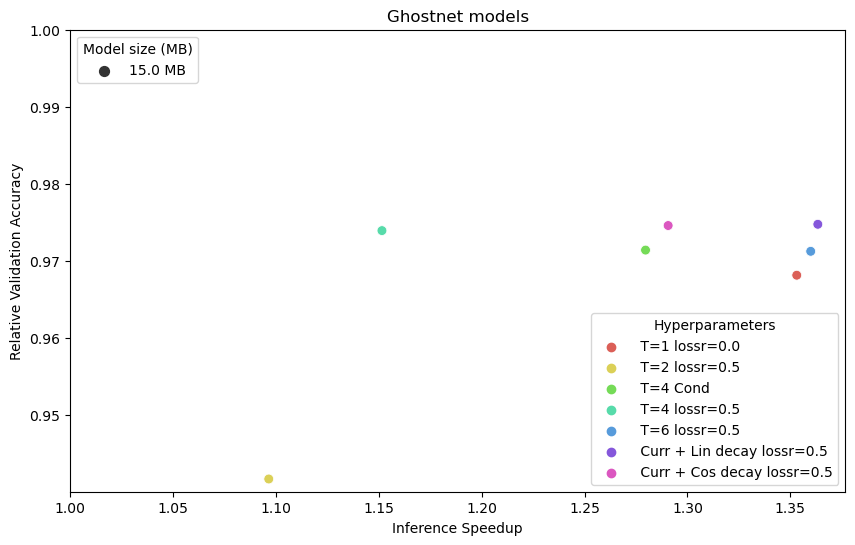

In [146]:
scatterplot_compare(df=df[df["student_model_name"].isin(["ghostnet"])], 
                    model_group="ghostnet", plot=True)

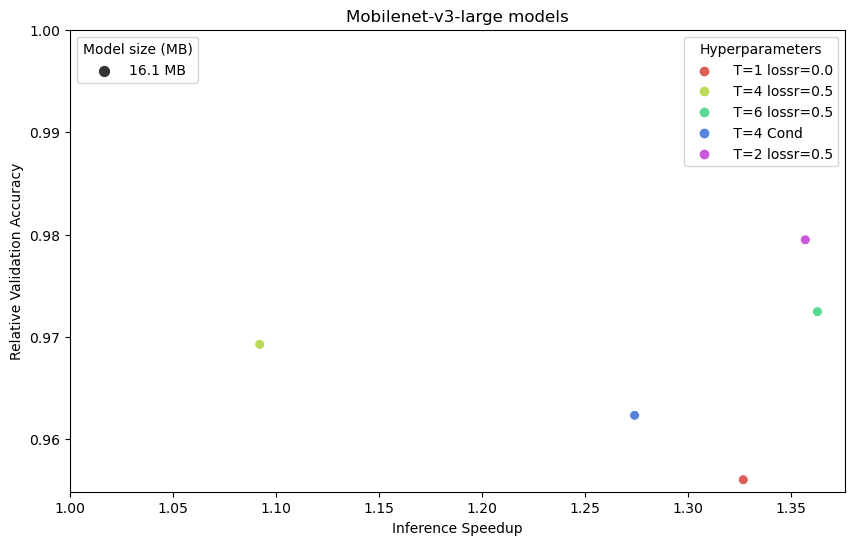

In [147]:
scatterplot_compare(df=df[df["student_model_name"].isin(["mobilenet-V3-large"])], 
                    model_group="mobilenet-V3-large", plot=True,
                    model_name_pos="upper right")

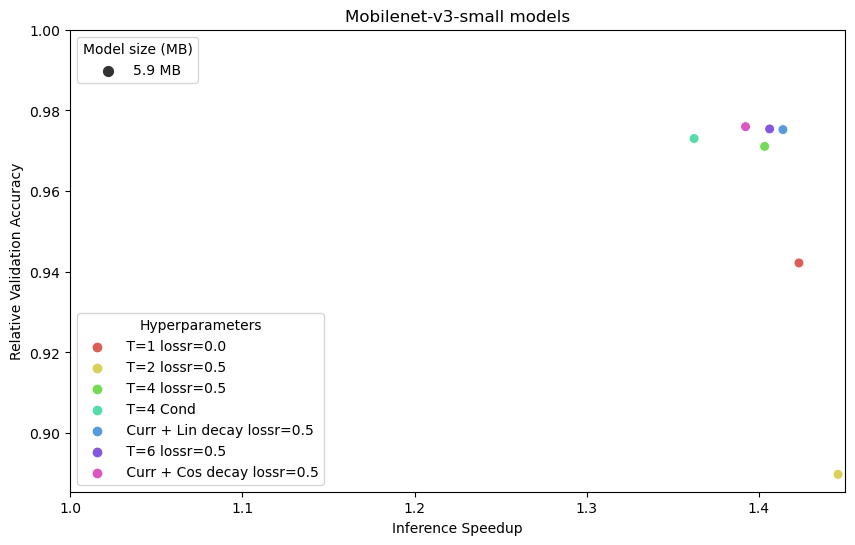

In [148]:
scatterplot_compare(df=df[df["student_model_name"].isin(["mobilenet-V3-small"])], 
                    model_group="mobilenet-V3-small", plot=True,
                    model_name_pos="lower left")

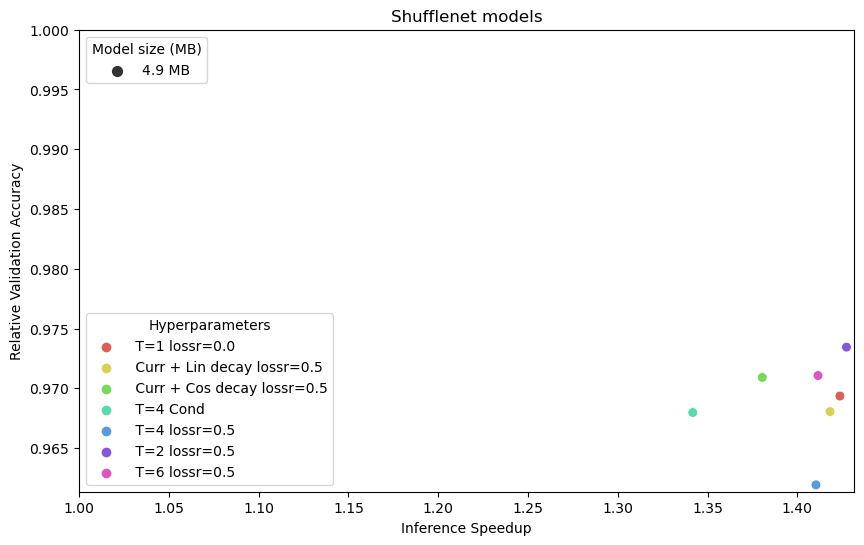

In [149]:
scatterplot_compare(df=df[df["student_model_name"].isin(["shufflenet"])], 
                    model_group="shufflenet", plot=True,
                    model_name_pos="lower left")

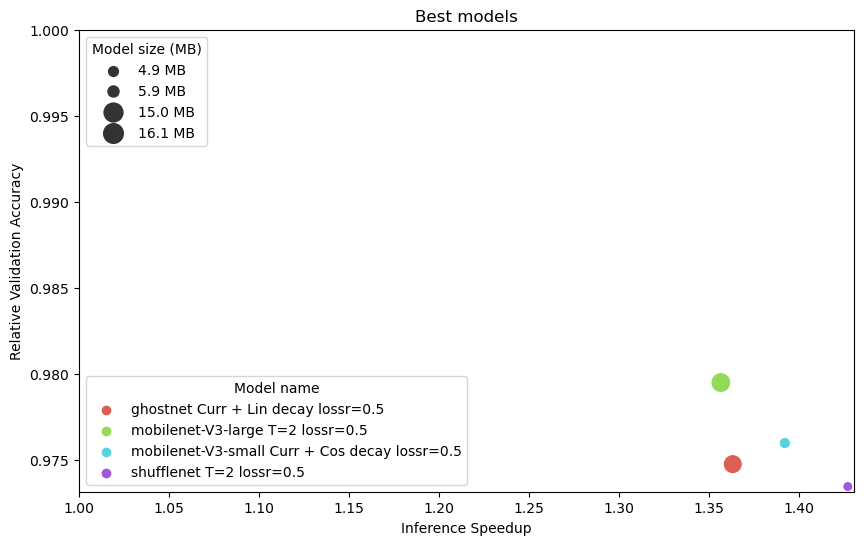

In [150]:
# Save results for best model (based on val acc) of each architecture
best_df = df.loc[df.groupby('student_model_name')['val_acc'].idxmax()].reset_index(drop=True)
best_df = best_df[best_df["student_model_name"] != "teacher_model"] # exclude teacher model
scatterplot_compare(best_df, model_group="best", plot=True,
                    model_name_pos="lower left")